Import the modules that will be used.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

1. Dot product between 2 vectors **$a$** and **$b$** involves the multiplication of each entry $a_i*b_i$ for n times; as well as the sum of each entry product $a_1b_1 + a_2b_2 + .. + a_nb_n$, where addition operation is performed n times. This results in a complexity of $O(n)$ since the constant 2 in $O(2n)$ is insignificant. 

2. In addition to case 1, we can treat each row of the matrix as a vector, thus performing the dot-product operation between each row of the matrix and the vector n times. This leads to a complexity of $O(n^2)$.

3. In addition to case 2, we can treat each column of the 2nd matrix as a vector, thus performing the matrix-vector-product operation between the 1st matrix and each column of the 2nd matrix n times. This leads to a complexity of $O(n^3)$.  

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

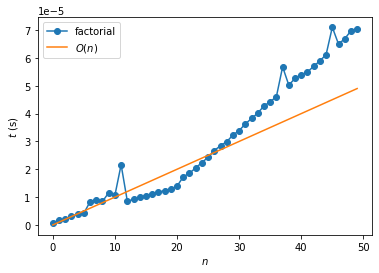

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

N = np.arange(0,50)

times = []
for n in N:
    t = %timeit -q -n1 -r2 -o factorial(n)
    times.append(t.best)

# Plot and label the time taken for factorial
plt.plot(N, times, marker = "o", label="factorial")
plt.xlabel("$n$")
plt.ylabel("$t$ (s)")

# Show a reference line of O(n)
plt.plot(N, 1e-6*N, label='$O(n)$')

plt.legend(loc=0)

plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [ ]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [ ]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [ ]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)
 
times = []
# Time search for different problem sizes
for n in N:
    A = np.random.rand(n, n)
    t = %timeit -q -n5 -r2 -o np.linalg.slogdet(A)
    times.append(t.best)

Plot result:

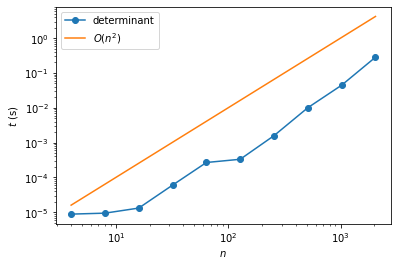

In [ ]:
# Plot and label the time taken for binary search
plt.loglog(N, times, marker='o', label='determinant')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Show reference line of O(n^2)
plt.loglog(N, 1e-6*N**2, label='$O(n^2)$')

# Add legend
plt.legend(loc=0);

plt.show()